# Linear Solvers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

## Direct Solvers

Direct solvers are good for all systems, are expensive, but do not incur iterative error, only roundoff errors

examples:\
Gaussian elimination, Thomas, Jordan Elimination, Gauss-Jordan Elimination



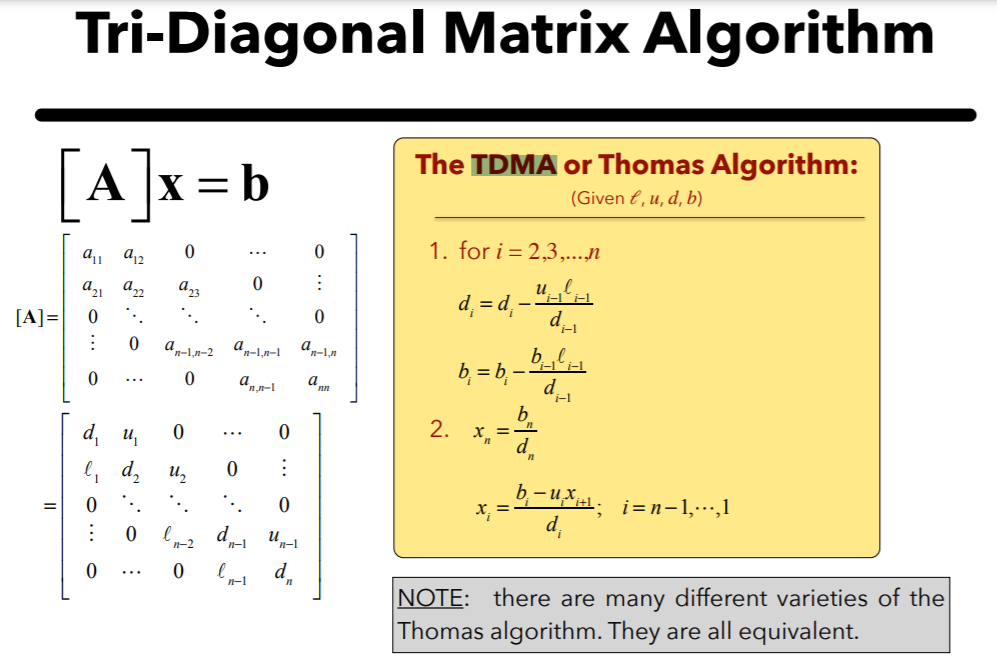

#### Example of implementation of Thomas Algorithm for the heat equation

In [2]:
L = 1.0 # length of slab
n = 100 # num of equations
x = np.linspace(0, L, n)
dx = L/(n-1)


let the heat source be $ \mathbf{S}(x)=\alpha e^{(x-x_0)^2/\sigma^2}$

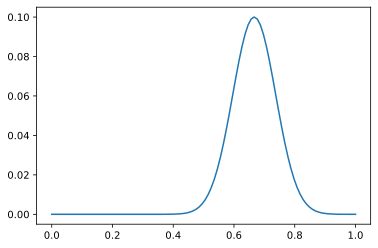

In [3]:
def source(x):
    """ heat source function"""
    α = 0.1
    σ = 0.1
    x0 = 2*L/3
    return α * np.exp(-(x-x0)**2/σ/σ)
plt.plot(x, source(x))

def thomas(l_ ,d_ ,u_ ,b_):
    lower = l_.copy()
    main = d_.copy()
    upper = u_.copy()

    b = b_.copy()
    n = len(main) # size of main diagonal
    x = np.zeros(n) # define solution vector
    for i in range(1,n):
        main[i] = main[i] - upper[i-1]*lower[i-1]/main[i-1]
        b[i] = b[i] - b[i-1]*lower[i-1]/main[i-1]

    x[n-1] = b[n-1]/main[n-1]
    for i in range(n-2,-1,-1):
        x[i] = (b[i]-upper[i]*x[i+1])/main[i]
    return x

In [4]:
TL = 300# temp to lest
TR = 350 #temp to right
k = 1.0e-5 # heat transfer coefficient

# define the system 
# define matrix A
md = -2.0 * np.ones(n) # main diagonal
md[0], md[-1] = 1.0, 1.0
ld = np.ones(n-1) # lower diagonal
ld[-1] = 0.0
ud = np.ones(n-1) # upper diagonal
ud[0] = 0.0

# define b
rhs = -dx*dx/k * source(x)
rhs[0], rhs[-1] = TL, TR

# solve using the thomas finction
Tthomas = thomas(ld, md, ud, rhs)

# check solution using numpy.linalg.solve()
A = np.diag(ld, -1) + np.diag(md, 0) + np.diag(ud, 1)
Tsolve = np.linalg.solve(A, rhs)

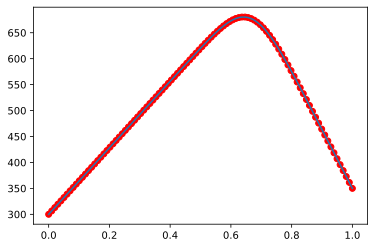

In [5]:
plt.plot(x, Tthomas, 'ro')
plt.plot(x, Tsolve)

## Jacobi iterative solver


Intuition using system of 3 equations

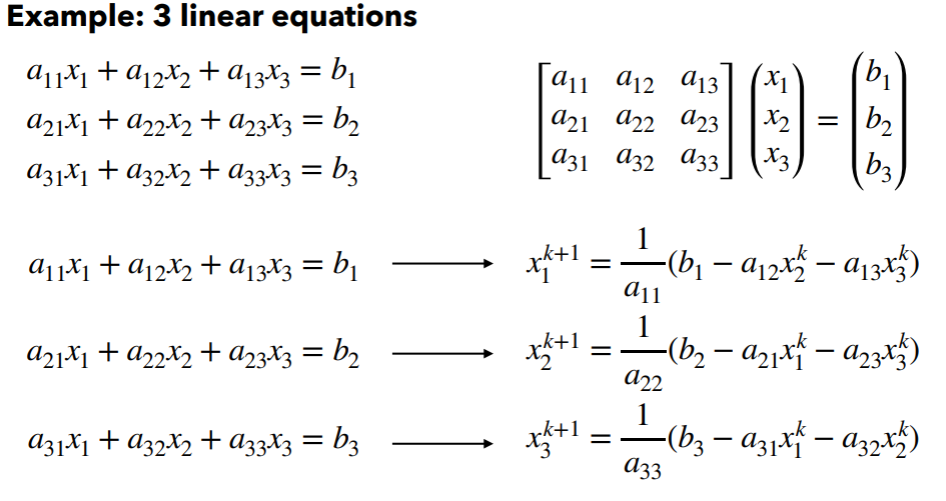


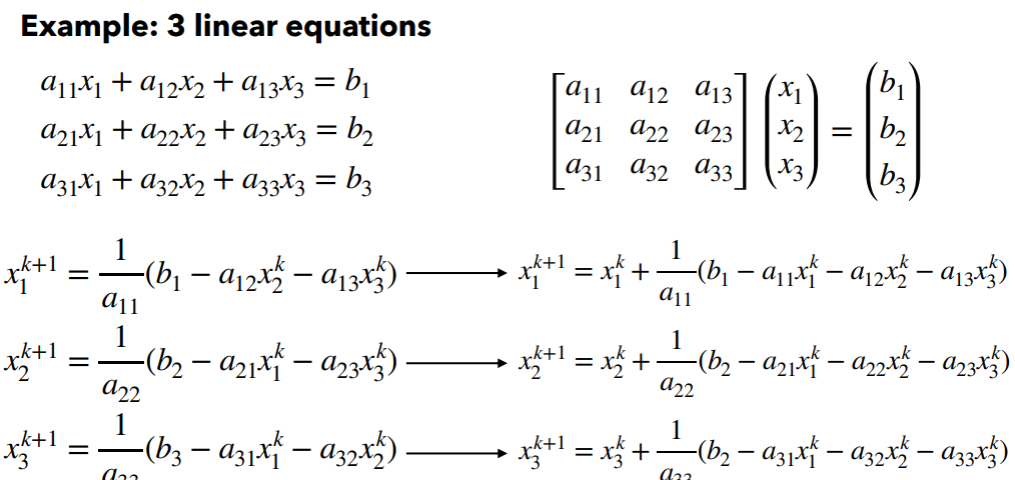

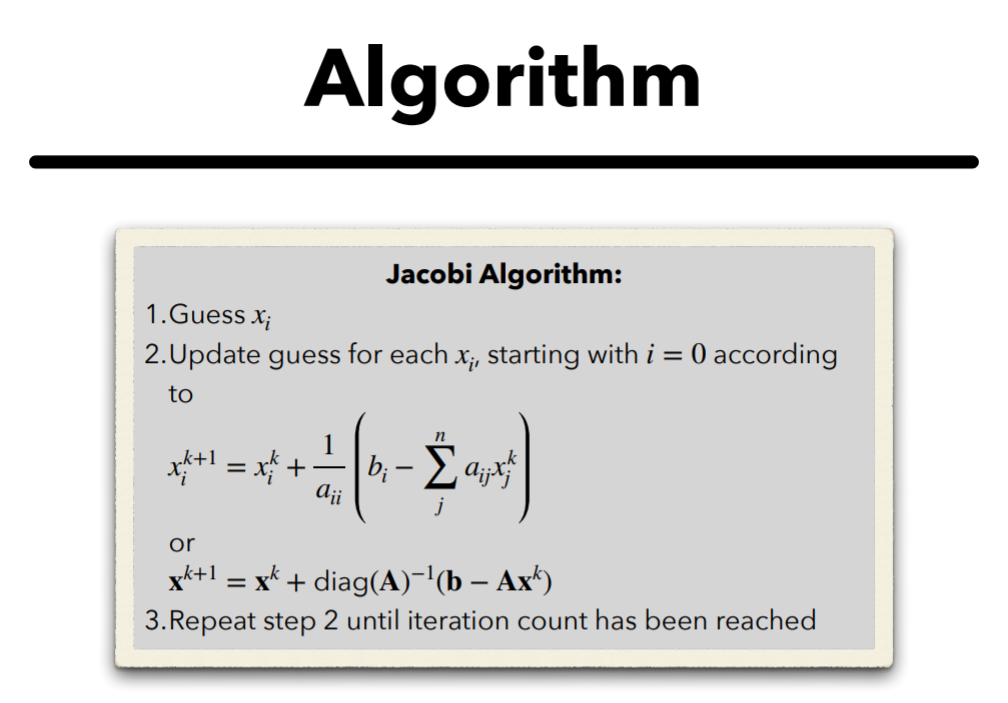

#### Jacobi implementation example

In [9]:
A = [[5,1,1],
     [2,3,0],
     [3,0,4]]
b = [10,11,12]
x0 = [0.0, 0.0, 0.0] # initial guess

In [26]:
x1 = []
x2 = []
x3 = []
def jacobi(A,b,xguess,tol):
    # Make sure A is a numpy array
    A = np.array(A)
    [nr,nc] = A.shape
    error = np.linalg.norm(b - A@xguess, 2)
    print('error', error)
    iter = 0 # counter
    sol  = np.zeros(nr) # declare x array
    print('i \t x1 \t x2 \t x3 \t error \n')    
    while (error > tol):
        
        # loop over the rows
        for i in range(0,nr):
            # update guesses
            sol[i] = xguess[i] + 1.0/A[i][i] * (b[i] - A[i]@xguess)

        error = np.linalg.norm(b - A@sol, 2)
        print(iter, '\t', sol, error)    
        #make sure x and xguess are NOT the same
        xguess = sol.copy()
        
        iter +=1
    return sol

In [27]:
jacobi(A,b,x0,1e-2)

error 19.1049731745428
i 	 x1 	 x2 	 x3 	 error 

0 	 [2.         3.66666667 3.        ] 9.820613241770822
1 	 [0.66666667 2.33333333 1.5       ] 5.580223014261072
2 	 [1.23333333 3.22222222 2.5       ] 2.7825070851684006
3 	 [0.85555556 2.84444444 2.075     ] 1.58106318737397
4 	 [1.01611111 3.0962963  2.35833333] 0.7883770074643799
5 	 [0.90907407 2.98925926 2.23791667] 0.4479679030892909
6 	 [0.95456481 3.06061728 2.31819444] 0.2233734854482415
7 	 [0.92423765 3.03029012 2.28407639] 0.1269242392086355
8 	 [0.9371267  3.05050823 2.30682176] 0.06328915421033747
9 	 [0.928534   3.04191553 2.29715498] 0.035961867775781045
10 	 [0.9321859 3.047644  2.3035995] 0.017931927026263065
11 	 [0.9297513  3.0452094  2.30086058] 0.010189195869804737
12 	 [0.930786   3.04683247 2.30268652] 0.005080712657440219


array([0.930786  , 3.04683247, 2.30268652])

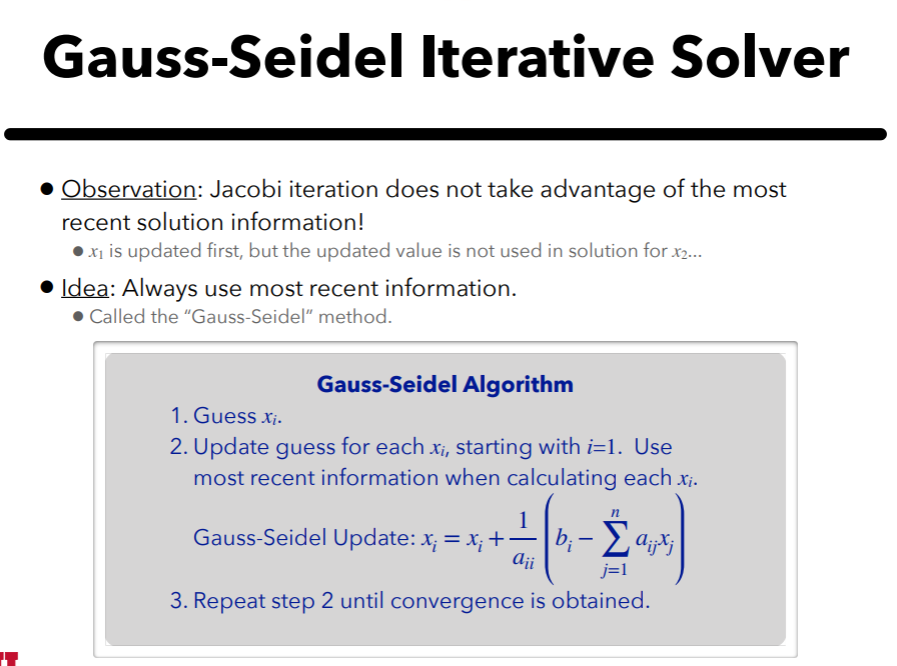

#### Gauss-Seidel implementation example

In [28]:
def gauss_seidel(A,b,xguess,tol):
    # Make sure A is a numpy array
    A = np.array(A)
    [nr,nc] = A.shape
    count = 0 # counter
    x = np.array(xguess)
    print(x)
    error = np.linalg.norm(b - A.dot(x), 2)
    print ('i \t x1 \t x2 \t x3 \t error \n')
    while (count < 10):
        print(count, '\t', x, error)
        # loop over the rows
        for i in range(0,nr):
            x[i] = x[i] + 1.0/A[i][i] * (b[i] - A[i].dot(x))
        error = np.linalg.norm( b - A.dot(x), 2 )
        count +=1
    return x

In [29]:
tol = 1e-5

print('Jacobi solution:')
jacobi(A,b,x0,tol)

print('Gauss-Seidel solution:')
gauss_seidel(A,b,x0,tol)

Jacobi solution:
error 19.1049731745428
i 	 x1 	 x2 	 x3 	 error 

0 	 [2.         3.66666667 3.        ] 9.820613241770822
1 	 [0.66666667 2.33333333 1.5       ] 5.580223014261072
2 	 [1.23333333 3.22222222 2.5       ] 2.7825070851684006
3 	 [0.85555556 2.84444444 2.075     ] 1.58106318737397
4 	 [1.01611111 3.0962963  2.35833333] 0.7883770074643799
5 	 [0.90907407 2.98925926 2.23791667] 0.4479679030892909
6 	 [0.95456481 3.06061728 2.31819444] 0.2233734854482415
7 	 [0.92423765 3.03029012 2.28407639] 0.1269242392086355
8 	 [0.9371267  3.05050823 2.30682176] 0.06328915421033747
9 	 [0.928534   3.04191553 2.29715498] 0.035961867775781045
10 	 [0.9321859 3.047644  2.3035995] 0.017931927026263065
11 	 [0.9297513  3.0452094  2.30086058] 0.010189195869804737
12 	 [0.930786   3.04683247 2.30268652] 0.005080712657440219
13 	 [0.9300962  3.04614266 2.3019105 ] 0.002886938829776866
14 	 [0.93038937 3.04660253 2.30242785] 0.001439535252940736
15 	 [0.93019392 3.04640709 2.30220797] 0.0008179660

array([0.93024515, 3.04650324, 2.30231614])

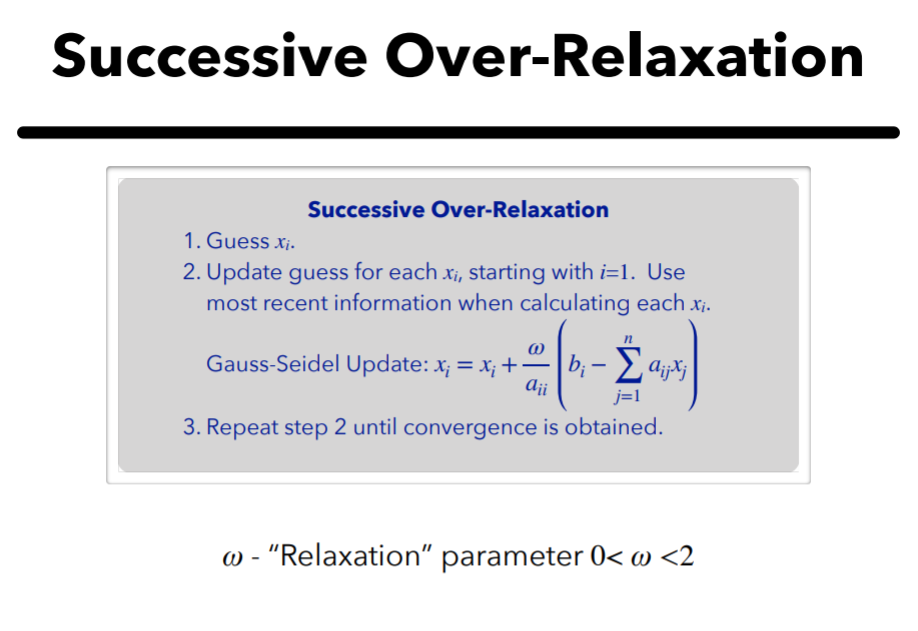

#### SOR implementation example

In [30]:
def overrelaxation(A,b,xguess,tol,w):
    # Make sure A is a numpy array
    A = np.array(A)
    [nr,nc] = A.shape
    count = 0 # counter
    x = np.array(xguess)
    print(x)
    error = np.linalg.norm(b - A.dot(x), 2)
    print ('i \t x1 \t x2 \t x3 \t error \n')
    while (count < 10):
        print(count, '\t', x, error)
        # loop over the rows
        for i in range(0,nr):
            x[i] = x[i] + w/A[i][i] * (b[i] - A[i].dot(x))
        error = np.linalg.norm( b - A.dot(x), 2 )
        count +=1
    return x

In [31]:
overrelaxation(A,b,x0,tol,2.0)

[0. 0. 0.]
i 	 x1 	 x2 	 x3 	 error 

0 	 [0. 0. 0.] 19.1049731745428
1 	 [4. 2. 0.] 12.36931687685298
2 	 [-0.8  6.4  7.2] 15.845504094221809
3 	 [-0.64        1.78666667 -0.24      ] 20.127120454197566
4 	 [4.02133333 0.18488889 0.208     ] 10.808158491404017
5 	 [-0.17848889  7.38642963  6.05973333] 16.13017469312831
6 	 [-1.1999763   1.5468721   1.74023111] 17.691045800792438
7 	 [ 3.88513501  0.60628122 -1.56793363] 10.835409334283016
8 	 [0.49952595 6.06101751 6.8186447 ] 19.421660239707254
9 	 [-1.65139084  3.47417027  1.65844156] 17.141051613476623


array([ 3.59834611, -0.93863175, -1.05596072])

### Determining error in matrix solvers

$$
\begin{matrix}
   & Absolute & Relative\\
True & \epsilon_t = ||\mathbf{b}-\mathbf{Ax}|| = \left|\left|b_i-\sum^n_{j=1}a_{ij}x_j^k\right|\right|\ \  & \epsilon_t = ||[\mathbf{b}-\mathbf{Ax}]\mathbf{b}^{-1}|| = \left|\left|\frac{b_i-\sum^n_{j=1}a_{ij}x_j^k}{b_i}\right|\right| \\
Approximate & \epsilon_a = ||\mathbf{x}^k-\mathbf{x}^{k-1}||= \left|\left|x^k_i-x^{k-1}_i\right|\right| & \epsilon_a = \left|\left|\frac{x^k_i-x^{k-1}_i}{x^k_i}\right|\right|
\end{matrix}
$$

where $x^k$ is the estimate of $x$ and $i=1, 2, ..., n$